## **ResNet Multiclass Image Classification using Transfer learning**

In this notebook I have shown how a transfer learning / pre trained CNN Model  is implemented on a multiclass image classification problem. I have covered

How to create a ResNet CNN Model and Train it.

How to evaluate the model on test set using different classification metrics.

How to visualize the images present in the training and test set.

**1. Import the Required Libraries**

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np


import tensorflow as tf
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow import keras

In [2]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.3 MB 8.2 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 212 kB 70.1 MB/s 
     |████████████████████████████████| 2.3 MB 42.4 MB/s 
     |████████████████████████████████| 270 kB 50.2 MB/s 
     |████████████████████████████████| 84 kB 2.9 MB/s 
     |████████████████████████████████| 57 kB 4.6 MB/s 
     |████████████████████████████████| 84 kB 2.7 MB/s 
     |████████████████████████████████| 55 kB 2.8 MB/s 
     |████████████████████████████████| 112 kB 55.7 MB/s 
     |████████████████████████████████| 63 kB 1.9 MB/s 
     |████████████████████████████████| 80 kB 8.6 MB/s 
     |████████████████████████████████| 68 kB 6.8 MB/s 
     |████████████████████████████████| 43 kB 2.3 MB/s 
     |████████████████████████████████| 594 kB 50.0 MB/s 
     |████████████████████████████████| 856 kB 57.

**2. Load the Image Training and Validation Datasets**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2.1. Get the Image Dataset Path**

In [4]:
data_path = "/content/drive/MyDrive/Darwin Digitech/dataset"
train_data = "/content/drive/MyDrive/Darwin Digitech/dataset/train"
val_data = "/content/drive/MyDrive/Darwin Digitech/dataset/val"

**2.2. Load Image Datasets and Apply Augmentations**

Since the images present in the datasets are various in size, the image height and width are taken as 150, 150 respectively. The batch size value can be changed if required.

In [5]:
img_width = 180
img_height = 180
batch_size = 32

**Loading the training dataset and applying augmentations on it.**

In [6]:
train_gen = tf.keras.preprocessing.image_dataset_from_directory(
  train_data,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 750 files belonging to 5 classes.


**Loading the validation dataset.**

In [7]:
val_gen = tf.keras.preprocessing.image_dataset_from_directory(
  val_data ,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 125 files belonging to 5 classes.


**3. Training a VGG CNN Model**

In [8]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=3,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

94781440/94765736 [==============================] - 1s 0us/step


In [9]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

In [10]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [12]:
history_resnet = resnet_model.fit(train_gen, validation_data=val_gen, epochs=5)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


24/24 [==============================] - 160s 5s/step - loss: 0.7765 - accuracy: 0.7253 - val_loss: 1.3115 - val_accuracy: 0.5680
Epoch 2/5
24/24 [==============================] - 87s 4s/step - loss: 0.1658 - accuracy: 0.9493 - val_loss: 1.2894 - val_accuracy: 0.5600
Epoch 3/5
24/24 [==============================] - 88s 4s/step - loss: 0.0575 - accuracy: 0.9827 - val_loss: 0.8403 - val_accuracy: 0.7360
Epoch 4/5
24/24 [==============================] - 88s 4s/step - loss: 0.0253 - accuracy: 0.9947 - val_loss: 0.9010 - val_accuracy: 0.6800
Epoch 5/5
24/24 [==============================] - 86s 4s/step - loss: 0.0154 - accuracy: 0.9960 - val_loss: 0.8941 - val_accuracy: 0.7200


**3.1. Plotting the Model A Metrics**

In [13]:
train_accuracy = history_resnet.history['accuracy']
val_accuracy = history_resnet.history['val_accuracy']

train_loss = history_resnet.history['loss']
val_loss = history_resnet.history['val_loss']

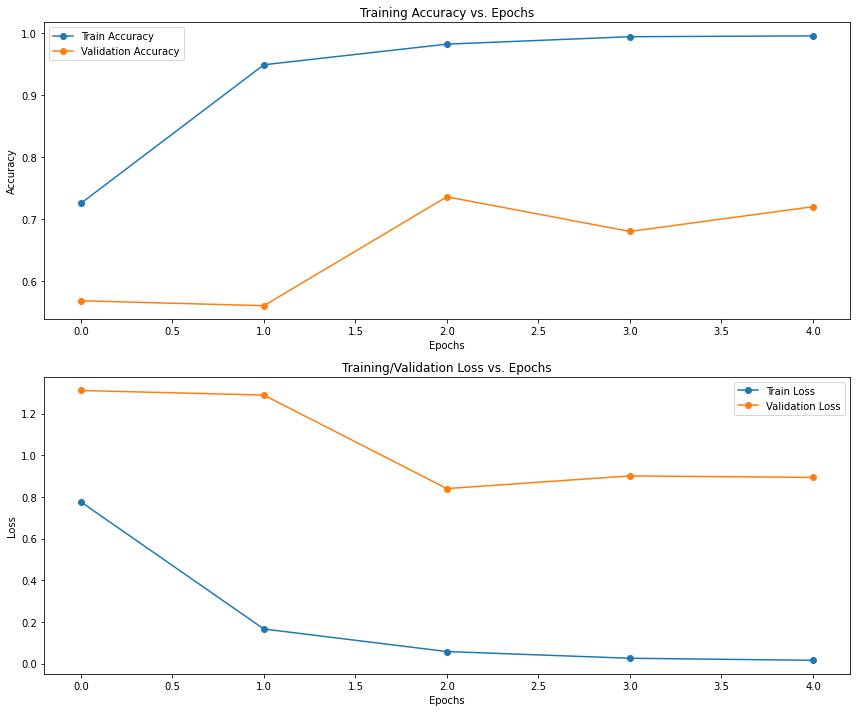

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')



plt.tight_layout()
plt.show()

**3.2. Testing the Model on Test Set**

In [15]:
test_dataset = '/content/drive/MyDrive/Darwin Digitech/dataset/test'

In [16]:
test_gen = tf.keras.preprocessing.image_dataset_from_directory(
  test_dataset,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 125 files belonging to 5 classes.


In [17]:
test_loss, test_accuracy = resnet_model.evaluate(test_gen, batch_size=batch_size)

4/4 [==============================] - 29s 3s/step - loss: 1.3587 - accuracy: 0.6000


In [18]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy*100}")

Test Loss:     1.3587206602096558
Test Accuracy: 60.00000238418579


In [19]:
class_names = train_gen.class_names
print(class_names)

['boat_pose', 'cow_pose', 'downward_facing_dog_pose', 'plank_pose', 'tree_pose']


**3.3 Test VGG Model Predictions On Gradio GUI** 

In [20]:
def predict_image(img):
  img_5d=img.reshape(-1,180,180,3)
  prediction=resnet_model(img_5d)[0]
  return {class_names[i]: float(prediction[i]) for i in range(5)}

In [ ]:
# import gradio as gr

# image = gr.inputs.Image(shape=(180,180))
# label = gr.outputs.Label(num_top_classes=5)

# gr.Interface(fn=predict_image, inputs=image, outputs=label,interpretation='default').launch(debug='True')

**4. Saving Model for Building Tensorflow.js**

In [21]:
tf.keras.models.save_model(resnet_model,'resnet_model.hdf5')